In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/pre_entrega/neo.csv/neo.csv')

In [ ]:
print(df.head())
filas, columnas = df.shape
print(f"El DataFrame tiene {filas} filas y {columnas} columnas.")

        id                 name  est_diameter_min  est_diameter_max  \
0  2162635  162635 (2000 SS164)          1.198271          2.679415   
1  2277475    277475 (2005 WK4)          0.265800          0.594347   
2  2512244   512244 (2015 YE18)          0.722030          1.614507   
3  3596030          (2012 BV13)          0.096506          0.215794   
4  3667127          (2014 GE35)          0.255009          0.570217   

   relative_velocity  miss_distance orbiting_body  sentry_object  \
0       13569.249224   5.483974e+07         Earth          False   
1       73588.726663   6.143813e+07         Earth          False   
2      114258.692129   4.979872e+07         Earth          False   
3       24764.303138   2.543497e+07         Earth          False   
4       42737.733765   4.627557e+07         Earth          False   

   absolute_magnitude  hazardous  
0               16.73      False  
1               20.00       True  
2               17.83      False  
3               22.20   

In [ ]:
df_limpio = df.drop(columns=['id', 'name', 'orbiting_body', 'sentry_object'])
df_limpio.dropna(inplace=True)
print(df_limpio.head())

   est_diameter_min  est_diameter_max  relative_velocity  miss_distance  \
0          1.198271          2.679415       13569.249224   5.483974e+07   
1          0.265800          0.594347       73588.726663   6.143813e+07   
2          0.722030          1.614507      114258.692129   4.979872e+07   
3          0.096506          0.215794       24764.303138   2.543497e+07   
4          0.255009          0.570217       42737.733765   4.627557e+07   

   absolute_magnitude  hazardous  
0               16.73      False  
1               20.00       True  
2               17.83      False  
3               22.20      False  
4               20.09       True  


In [ ]:
print(df_limpio.describe())

       est_diameter_min  est_diameter_max  relative_velocity  miss_distance  \
count      90836.000000      90836.000000       90836.000000   9.083600e+04   
mean           0.127432          0.284947       48066.918918   3.706655e+07   
std            0.298511          0.667491       25293.296961   2.235204e+07   
min            0.000609          0.001362         203.346433   6.745533e+03   
25%            0.019256          0.043057       28619.020645   1.721082e+07   
50%            0.048368          0.108153       44190.117890   3.784658e+07   
75%            0.143402          0.320656       62923.604633   5.654900e+07   
max           37.892650         84.730541      236990.128088   7.479865e+07   

       absolute_magnitude  
count        90836.000000  
mean            23.527103  
std              2.894086  
min              9.230000  
25%             21.340000  
50%             23.700000  
75%             25.700000  
max             33.200000  


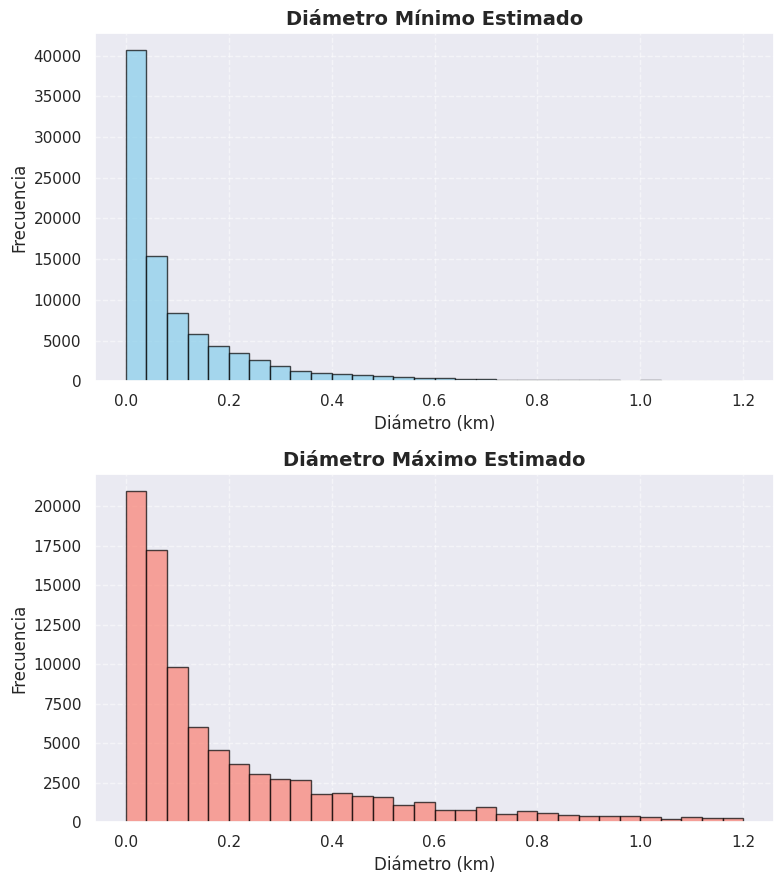

In [ ]:
# @title Diámetro mínimo y máximo estimado
# Set the overall style (optional, can be 'seaborn', 'ggplot', etc.)
sns.set_theme(style="darkgrid")

# Create the figure with a custom size
plt.figure(figsize=(8, 9))

# Plot the first subplot (Histogram for 'est_diameter_min')
plt.subplot(2, 1, 1)
df_limpio["est_diameter_min"].plot.hist(
    range=(0, 1.2),
    bins=30,  # Number of bins
    color='skyblue',  # Bar color
    edgecolor='black',  # Edge color of bars
    alpha=0.7  # Transparency
)
plt.title("Diámetro Mínimo Estimado", fontsize=14, weight='bold')  # Bold title
plt.xlabel("Diámetro (km)", fontsize=12)  # X-axis label
plt.ylabel("Frecuencia", fontsize=12)  # Y-axis label
plt.grid(True, linestyle='--', alpha=0.5)  # Custom grid style

# Plot the second subplot (Histogram for 'est_diameter_max')
plt.subplot(2, 1, 2)
df_limpio["est_diameter_max"].plot.hist(
    range=(0, 1.2),
    bins=30,  # Number of bins
    color='salmon',  # Bar color
    edgecolor='black',  # Edge color of bars
    alpha=0.7  # Transparency
)
plt.title("Diámetro Máximo Estimado", fontsize=14, weight='bold')  # Bold title
plt.xlabel("Diámetro (km)", fontsize=12)  # X-axis label
plt.ylabel("Frecuencia", fontsize=12)  # Y-axis label
plt.grid(True, linestyle='--', alpha=0.5)  # Custom grid style

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

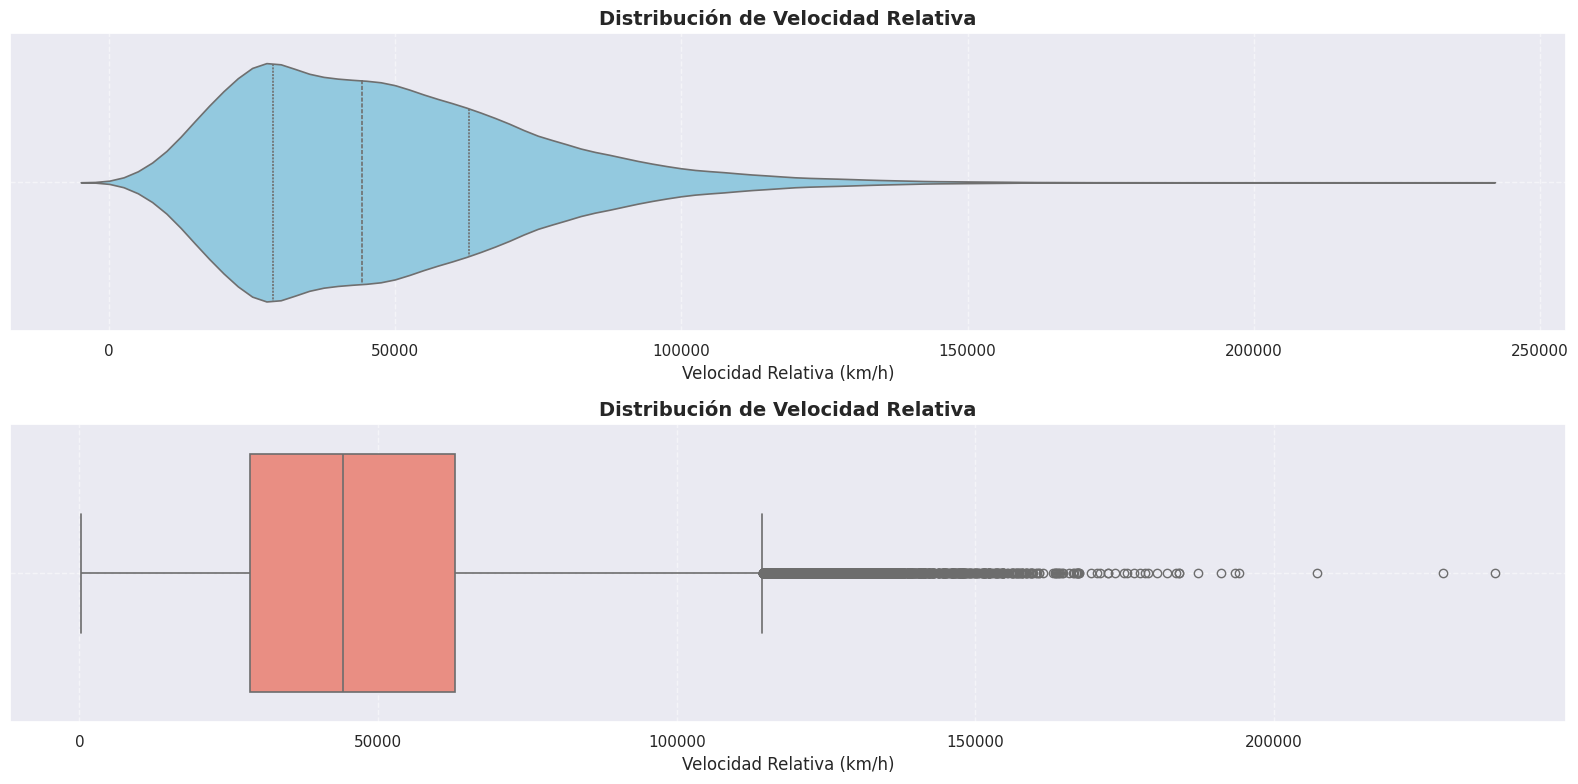

In [ ]:
# @title Velocidad relativa
# Set an overall style for the plots
sns.set_theme(style="darkgrid")

# Create the figure with a custom size
plt.figure(figsize=(16, 8))  # Adjusted the figure size for better fit

# Plot the violin plot
plt.subplot(2, 1, 1)
sns.violinplot(x=df['relative_velocity'], color="skyblue", inner="quartile", linewidth=1.2)
plt.xlabel("Velocidad Relativa (km/h)", fontsize=12)  # Custom X-axis label
plt.title("Distribución de Velocidad Relativa", fontsize=14, weight='bold')  # Title customization
plt.grid(True, linestyle='--', alpha=0.5)  # Adding gridlines for better readability

# Plot the box plot
plt.subplot(2, 1, 2)
sns.boxplot(x=df['relative_velocity'], color="salmon", linewidth=1.2)
plt.xlabel("Velocidad Relativa (km/h)", fontsize=12)  # Custom X-axis label
plt.title("Distribución de Velocidad Relativa", fontsize=14, weight='bold')  # Title customization
plt.grid(True, linestyle='--', alpha=0.5)  # Adding gridlines for better readability

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


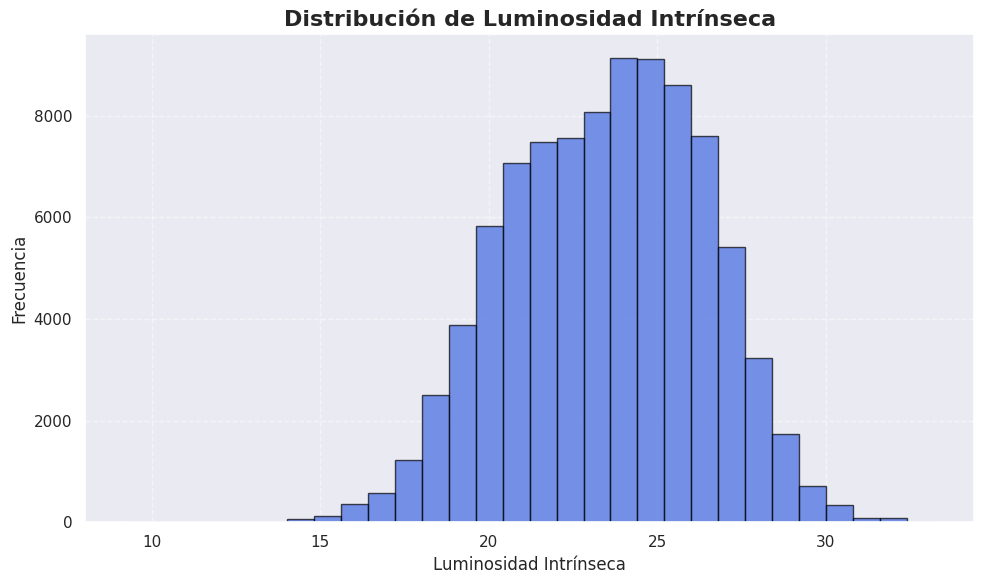

In [ ]:
#@title Distribución de Luminosidad Intrínseca
# Create the histogram for the intrinsic luminosity column
plt.figure(figsize=(10, 6))
df_limpio['absolute_magnitude'].plot.hist(
    bins=30,  # Set the number of bins for more detail
    color='royalblue',  # Custom color for the bars
    edgecolor='black',  # Add black edges to the bars
    alpha=0.7  # Set transparency for the bars
)

# Add title and labels
plt.title("Distribución de Luminosidad Intrínseca", fontsize=16, weight='bold')
plt.xlabel("Luminosidad Intrínseca", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)

# Add grid with custom style
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()


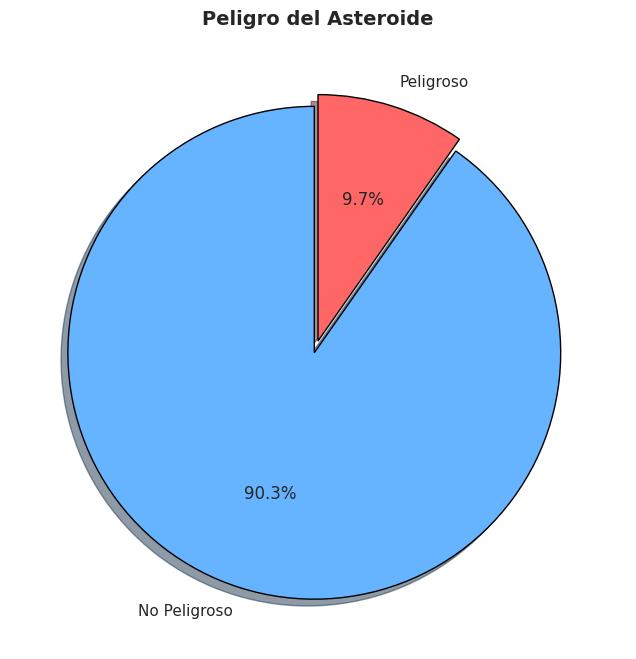

In [ ]:
# @title Peligro del Asteroide
# Get the counts of the 'hazardous' column
counts = df['hazardous'].value_counts()

# Create the pie chart with more styling
plt.figure(figsize=(8, 8))  # Set a larger figure size
colors = ['#66b3ff', '#ff6666']  # Custom colors for the pie chart

counts.plot.pie(
    labels=['No Peligroso', 'Peligroso'],  # Custom labels
    autopct='%1.1f%%',  # Show percentages with 1 decimal place
    colors=colors,  # Apply the custom colors
    startangle=90,  # Start the pie chart from 90 degrees for better orientation
    explode=(0.05, 0),  # Slightly "explode" the dangerous category
    shadow=True,  # Add a shadow effect for 3D look
    wedgeprops={'edgecolor': 'black'}  # Set black edges for each slice
)

# Add a title with custom styling
plt.title('Peligro del Asteroide', fontsize=14, weight='bold')

# Remove the Y-axis label for a cleaner look
plt.ylabel('')

# Display the pie chart
plt.show()


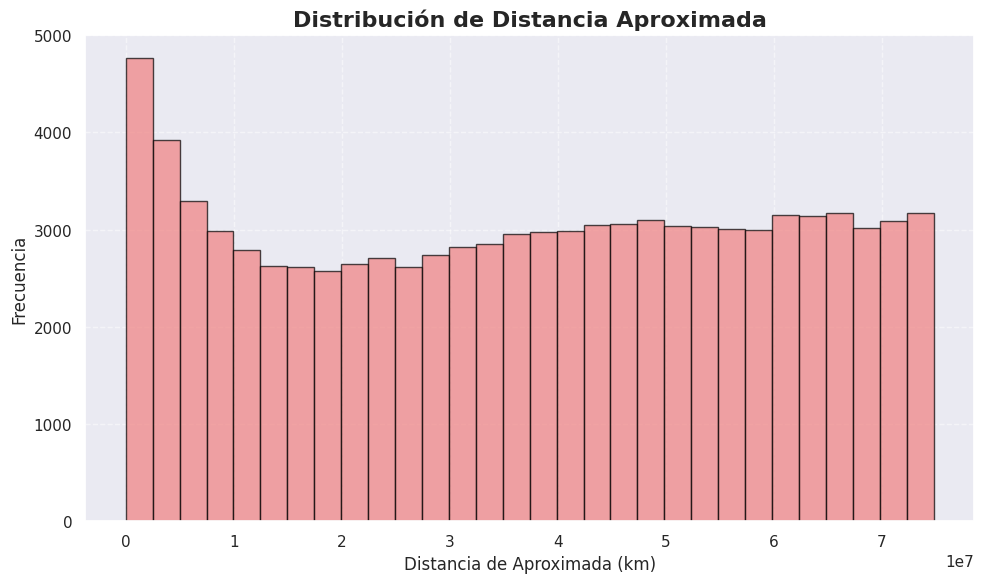

In [ ]:
# @title Distancia Apróximada
# Set overall figure size and style
plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid")

# Plot the histogram for 'miss_distance'
df_limpio['miss_distance'].plot.hist(
    bins=30,  # Set number of bins for more detail
    color='lightcoral',  # Custom color for the bars
    edgecolor='black',  # Add black edges to the bars
    alpha=0.7  # Set transparency for the bars
)

# Add title and labels with custom font size and style
plt.title("Distribución de Distancia Aproximada", fontsize=16, weight='bold')
plt.xlabel("Distancia de Aproximada (km)", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)

# Add a grid with custom style
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()  # Ensure everything fits within the figure
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer

In [ ]:
# Seleccionar las variables independientes y la dependiente
X = df_limpio[['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance']]
y = df_limpio['absolute_magnitude']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("DecisionTree")
dt_model = DecisionTreeRegressor(max_depth=10, criterion='squared_error')
dt_folds = [3, 5, 10, 15]
dt_results = []

for fold in dt_folds:
    scores = cross_val_score(dt_model, X_train, y_train, cv=fold, scoring='neg_mean_squared_error')
    mean_score = np.mean(-scores)
    dt_results.append(mean_score)
    print(f"  Folds: {fold}, MSE: {mean_score:.4f}")

DecisionTree
  Folds: 3, MSE: 0.0001
  Folds: 5, MSE: 0.0002
  Folds: 10, MSE: 0.0001
  Folds: 15, MSE: 0.0002


In [ ]:
print("\nRandomForest")
rf_model = RandomForestRegressor(n_estimators=100, criterion='squared_error', random_state=42)
rf_folds = [3, 5, 10, 15]
rf_results = []

for fold in rf_folds:
    scores = cross_val_score(rf_model, X_train, y_train, cv=fold, scoring='neg_mean_squared_error')
    mean_score = np.mean(-scores)
    rf_results.append(mean_score)
    print(f"  Folds: {fold}, MSE: {mean_score:.4f}")



RandomForest
  Folds: 3, MSE: 0.0001
  Folds: 5, MSE: 0.0001
  Folds: 10, MSE: 0.0001
  Folds: 15, MSE: 0.0001


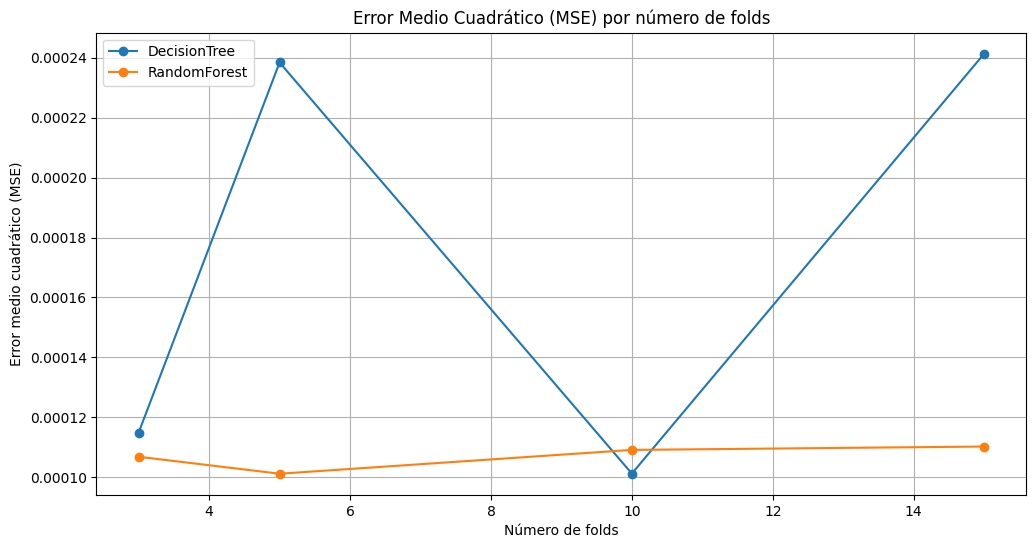

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(dt_folds, dt_results, marker='o', label='DecisionTree')
plt.plot(rf_folds, rf_results, marker='o', label='RandomForest')


plt.title('Error Medio Cuadrático (MSE) por número de folds')
plt.xlabel('Número de folds')
plt.ylabel('Error medio cuadrático (MSE)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print("\nResultados finales:")
best_dt_fold = dt_folds[np.argmin(dt_results)]
print(f"DecisionTree: Mejor número de folds: {best_dt_fold}, MSE: {min(dt_results):.4f}")

best_rf_fold = rf_folds[np.argmin(rf_results)]
print(f"RandomForest: Mejor número de folds: {best_rf_fold}, MSE: {min(rf_results):.4f}")

best_svr_fold = svr_folds[np.argmin(svr_results)]
print(f"SVR: Mejor número de folds: {best_svr_fold}, MSE: {min(svr_results):.4f}")


Resultados finales:
DecisionTree: Mejor número de folds: 10, MSE: 0.0001
RandomForest: Mejor número de folds: 5, MSE: 0.0001
SVR: Mejor número de folds: 10, MSE: 7.4246


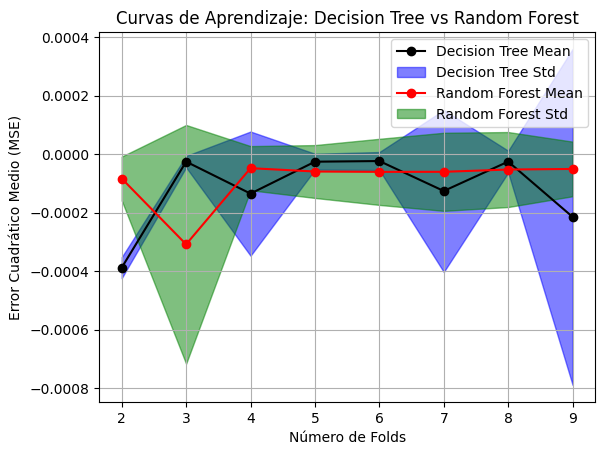

In [ ]:
dt_means, dt_stds = [], []
rf_means, rf_stds = [], []


nfolds_range = range(2, 10)

# Obtener los resultados para DecisionTree
for nfolds in nfolds_range:
    scores_dt = cross_val_score(dt_model, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(mean_squared_error))
    dt_means.append(np.mean(-scores_dt))
    dt_stds.append(np.std(-scores_dt))

# Obtener los resultados para RandomForest
for nfolds in nfolds_range:
    scores_rf = cross_val_score(rf_model, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(mean_squared_error))
    rf_means.append(np.mean(-scores_rf))
    rf_stds.append(np.std(-scores_rf))


plt.plot(nfolds_range, dt_means, label="Decision Tree Mean", color="black", linestyle='-', marker='o')
plt.fill_between(nfolds_range, np.array(dt_means) - np.array(dt_stds), np.array(dt_means) + np.array(dt_stds), color="blue", alpha=0.5, label="Decision Tree Std")

plt.plot(nfolds_range, rf_means, label="Random Forest Mean", color="red", linestyle='-', marker='o')
plt.fill_between(nfolds_range, np.array(rf_means) - np.array(rf_stds), np.array(rf_means) + np.array(rf_stds), color="green", alpha=0.5, label="Random Forest Std")

plt.xlabel("Número de Folds")
plt.ylabel("Error Cuadrático Medio (MSE)")
plt.title("Curvas de Aprendizaje: Decision Tree vs Random Forest")
plt.legend()
plt.grid(True)


plt.show()

In [ ]:
# Función  entrenar y evaluar un modelo con un número variable de capas ocultas
def train_and_evaluate(hidden_layers, X_train, y_train, X_test, y_test):

    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))

    for _ in range(hidden_layers):
        model.add(Dense(64, activation='relu'))

    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')

    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
    return model


In [ ]:
hidden_layer_configs = [3, 6, 10]
results = []

for layers in hidden_layer_configs:

    model = train_and_evaluate(layers, X_train, y_train, X_test, y_test)
    y_pred = model.predict(X_test).flatten()
    mae = mean_absolute_error(y_test, y_pred)
    results.append((layers, mae))

print("Resultados:")
for layers, mae in results:
    print(f"Capas ocultas: {layers}, Mean Absolute Error: {mae:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


568/568 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


568/568 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


568/568 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Resultados:
Capas ocultas: 3, Mean Absolute Error: 2.4117
Capas ocultas: 6, Mean Absolute Error: 2.3873
Capas ocultas: 10, Mean Absolute Error: 2.3876
